## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata,
                                  how='left', on='Mouse ID')
# Display the data table for preview
combined_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [36]:
# Checking the number of mice.
total_mice = combined_data_df["Mouse ID"].nunique()
#Creating Data Frame
mouse_id_df = pd.DataFrame({"Total Mice": [total_mice]})
mouse_id_df.head()

,Total Mice
0,249


In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseid = combined_data_df.loc[combined_data_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouseid  

array(['g989'], dtype=object)

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseid_data = pd.DataFrame(combined_data_df) 
duplicate_mouseid_data = duplicate_mouseid_data.loc[combined_data_df["Mouse ID"] == "g989"]
duplicate_mouseid_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df.drop(combined_data_df[combined_data_df['Mouse ID'] == 'g989'].index)
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [40]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = clean_data_df["Mouse ID"].nunique()
new_total_mice

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

clean_data_sort_df = pd.DataFrame(clean_data_df.sort_values('Tumor Volume (mm3)'))
sum_stats_df = clean_data_sort_df.groupby(["Drug Regimen"])
sum_stats_df

drug_mean = sum_stats_df["Tumor Volume (mm3)"].mean()
drug_median = sum_stats_df["Tumor Volume (mm3)"].median()
drug_variance = sum_stats_df["Tumor Volume (mm3)"].var()
drug_std = sum_stats_df["Tumor Volume (mm3)"].std()
drug_sem = sum_stats_df["Tumor Volume (mm3)"].sem()

sum_stats = pd.DataFrame({"Mean": drug_mean, "Median":drug_median, "Variance":drug_variance, "Standard Deviation": drug_std, "SEM": drug_sem})

sum_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_df = pd.DataFrame(
    clean_data_sort_df.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}))
summary_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

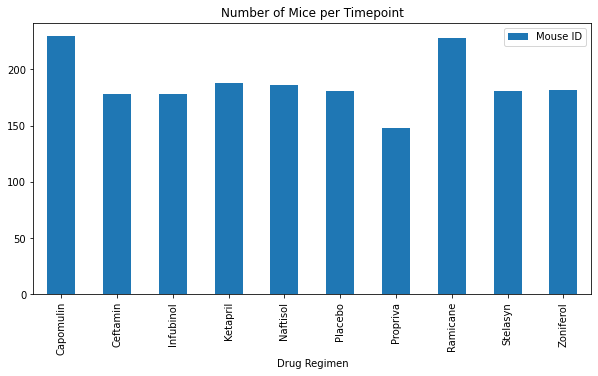

<Figure size 432x288 with 0 Axes>

In [43]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bar_plot_df = clean_data_sort_df.groupby(["Drug Regimen"])["Mouse ID"].count()
bar_plot_df = pd.DataFrame(bar_plot_df)
bar_plot_df

bar_plot_df.plot(kind="bar", figsize=(10,5))
# Set a title for the chart
plt.title("Number of Mice per Timepoint")
plt.show()
plt.tight_layout()

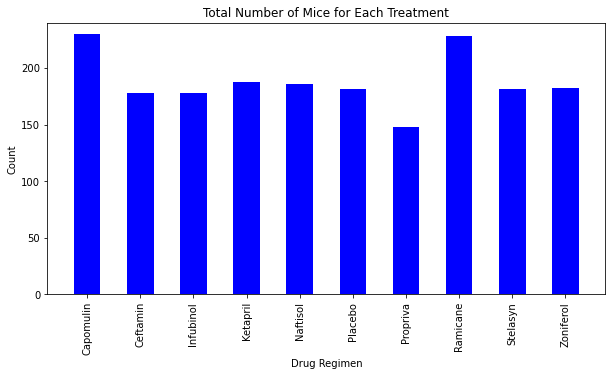

In [45]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#drugs = ["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
drugs = bar_plot_df.index
#count = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
count = bar_plot_df['Mouse ID']
plt.figure(figsize=(10, 5))

x_axis = np.arange(len(count))

plt.bar(x_axis, count, color="b", align="center", width = 0.5, tick_label = drugs)

plt.xticks(rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(count)+10.00)
plt.title("Total Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel('Count')
plt.show()


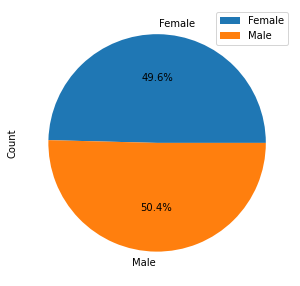

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# count_male = clean_data_sort_df.groupby('Sex')['Mouse ID'].nunique()['Male']
# count_female = clean_data_sort_df.groupby('Sex')['Mouse ID'].nunique()['Female']
bar_plot_df = clean_data_sort_df.groupby(["Mouse ID", "Sex"]).count()
bar_plot_df = pd.DataFrame(bar_plot_df)

bar_plot_df = pd.DataFrame(bar_plot_df.groupby('Sex')['Timepoint'].count())
bar_plot_df = bar_plot_df.rename(columns = {"Timepoint":"Count"})
# bar_plot_df["Percentage"] = bar_plot_df/new_total_mice*100
# bar_plot_df["Percentage"] = bar_plot_df["Percentage"].astype(float).map("{:,.2f}%".format)
bar_plot_df

bar_plot_df.plot(kind="pie", y = "Count", autopct='%1.1f%%', figsize=(5, 5)) 


([<matplotlib.patches.Wedge at 0x1fdc7c38be0>,
 [Text(0.015200833722885016, 1.1999037189100337, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.008867153005016259, 0.699943836030853, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

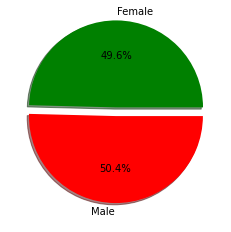

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#labels = ["Male", "Female"]
labels = bar_plot_df.index
# sizes = [125, 123]
sizes = bar_plot_df['Count']
colors = ["green", "red"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_df = pd.DataFrame(clean_data_df.loc[clean_data_df["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])])
four_df

# Start by getting the last (greatest) timepoint for each mouse
tumor_last = pd.DataFrame(four_df.groupby("Mouse ID")['Timepoint'].max())
tumor_last

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_four = pd.merge(tumor_last, clean_data_df,
                                  how='left', on=['Mouse ID', 'Timepoint'])
merge_four

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

#Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    tumor_vol_by_drug = merge_four['Tumor Volume (mm3)'].loc[merge_four["Drug Regimen"] == drug]    
# add subset 
    tumor_vol_data.append(tumor_vol_by_drug)
    quartiles = tumor_vol_by_drug. quantile([.25,.5,.75])
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine outliers using upper and lower bounds
print(f"The interquartile range of temperatures is: {iqr}")                                  
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")                                   


The interquartile range of temperatures is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


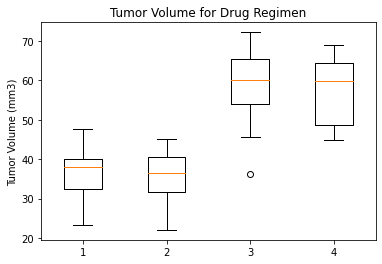

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
plt.show()

## Line and Scatter Plots

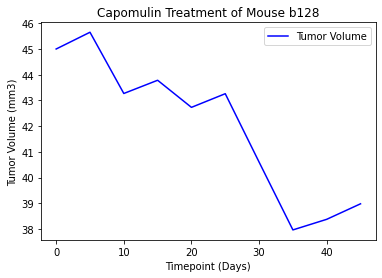

In [50]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = pd.DataFrame(clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin"])
capomulin_df_b128 = pd.DataFrame(capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"])
capomulin_df_b128

capomulin_df_b128, = plt.plot(capomulin_df_b128["Timepoint"], capomulin_df_b128["Tumor Volume (mm3)"], color="blue", label="Tumor Volume")

plt.legend(handles=[capomulin_df_b128], loc="best")

plt.title('Capomulin Treatment of Mouse b128')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()



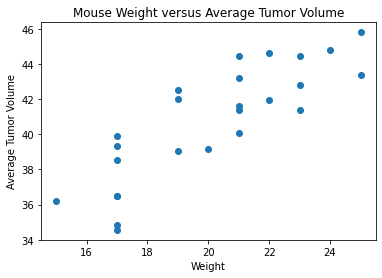

In [51]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = pd.DataFrame(clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin"])
capomulin_df = capomulin_df.groupby(["Mouse ID"])
capomulin_df

cap_tumor_mean = capomulin_df["Tumor Volume (mm3)"].mean()
cap_weight_mean = capomulin_df["Weight (g)"].mean()
cap_stats = pd.DataFrame({"Average Tumor Volume": cap_tumor_mean, "Weight": cap_weight_mean})
cap_stats

# cap_stats.plot(kind="scatter", x="Weight", y="Average Tumor Volume", grid=True, figsize=(8,8),
#               title="Mouse Weight versus Average Tumor Volume")
# plt.show()

plt.scatter(cap_stats['Weight'],cap_stats['Average Tumor Volume'])
plt.title("Mouse Weight versus Average Tumor Volume")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.show()


## Correlation and Regression

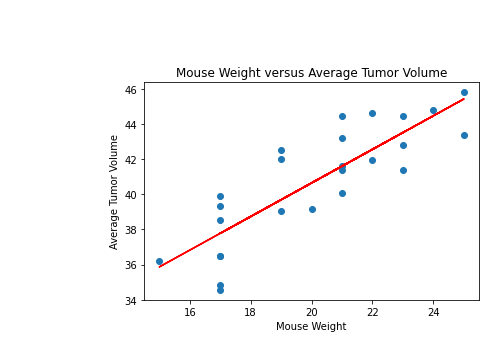

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = cap_stats['Weight']
y_values = cap_stats['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, 50),fontsize=15,color="red")
plt.title('Mouse Weight versus Average Tumor Volume')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()